<a href="https://colab.research.google.com/github/sayuru-j/deeplearning-project/blob/main/tree/main/IT20611774/IT20611774.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Dataset from kaggle and clean the duplicates**

In [1]:
#install kaggle
!pip install -q kaggle


In [2]:
#upload kaggle API key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ranindusachintha","key":"b55fef9b4f9c36985ebd73074540c1a1"}'}

In [3]:
#ceate kaggle directory in user's default path
!mkdir ~/.kaggle

In [4]:
#copy kaggle API key to kaggle directory
!cp kaggle.json ~/.kaggle/

In [5]:
#Permission grant for the json file
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
#import the kaggle breast cancer dataset
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

100% 3.10G/3.10G [00:36<00:00, 187MB/s]
100% 3.10G/3.10G [00:36<00:00, 91.4MB/s]


In [7]:
#unzip the imported kaggle breast cancer dataset
!unzip breast-histopathology-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2001_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2251_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2301_class0.png  
  inflating: IDC_regular_

In [8]:
#ceate dataset directory
!mkdir /content/dataset/


In [9]:
#ceate dataset/benign directory
!mkdir /content/dataset/benign/

In [10]:
#ceate dataset/malignant directory
!mkdir /content/dataset/malignant/

In [11]:
#remove the unwanted directory
!rm -rf /content/IDC_regular_ps50_idx5

In [12]:
#import necessary Dependencies
import glob
import shutil
import os
import math
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML


Take Balance sample of images (20000) from original dataset (avoid underrepresent of one class that may causes oversampling or undersampling)

In [13]:
#create benign image dataset without duplicates

# Get all png files from group of folders
png_files = glob.glob("/content/**/0/*.png", recursive=True)[:20000]

# Move the png files to the dataset folder and filter duplicates
for png_file in png_files:
    if not os.path.exists("/content/dataset/benign/" + os.path.basename(png_file)):
        shutil.move(png_file, "/content/dataset/benign/")


In [14]:
#create malignant image dataset without duplicates

# Get all png files in group of folders
png_files = glob.glob("/content/**/1/*.png", recursive=True)[:20000]

# Move the png files to the dataset folder
for png_file in png_files:
    if not os.path.exists("/content/dataset/malignant/" + os.path.basename(png_file)):
        shutil.move(png_file, "/content/dataset/malignant/")

In [15]:
#count benign and malignant images

# Get all PNG files in the dataset benign folder
png_files = glob.glob("/content/dataset/benign/*.png")

# Count the number of PNG files
num_png_files = len(png_files)
print(num_png_files)

# Get all PNG files in the dataset malignant folder
png_files = glob.glob("/content/dataset/malignant/*.png")

# Count the number of PNG files
num_png_files = len(png_files)
print(num_png_files)


20000
20000


In [16]:
#check the dataset size
!du -h /content/dataset/

153M	/content/dataset/benign
157M	/content/dataset/malignant
310M	/content/dataset/


In [17]:
#create Constants
BATCH_SIZE = 32
IMG_SIZE = 50
CHANNELS=3
EPOCHS=20

In [18]:
# Import image data into tensorflow dataset object
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    seed=111,
    shuffle=True,
    image_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE
)

Found 40000 files belonging to 2 classes.


In [19]:
#store class names
class_names = dataset.class_names
class_names

['benign', 'malignant']

In [20]:
#check data set batch count
len(dataset)

1250

**Preview batches**

In [21]:
#preview first batch data
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 50, 50, 3)
[0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0]


In [22]:
#preview first batch as tensor
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[223. 179. 199.]
  [234. 223. 233.]
  [235. 215. 223.]
  ...
  [221. 164. 192.]
  [180. 128. 169.]
  [223. 182. 201.]]

 [[226. 195. 207.]
  [230. 200. 220.]
  [223. 181. 202.]
  ...
  [216. 151. 185.]
  [219. 160. 189.]
  [216. 167. 196.]]

 [[214. 156. 189.]
  [224. 184. 200.]
  [235. 213. 225.]
  ...
  [185. 131. 167.]
  [173. 118. 159.]
  [217. 157. 187.]]

 ...

 [[223. 169. 187.]
  [222. 173. 194.]
  [222. 168. 197.]
  ...
  [223. 173. 199.]
  [243. 233. 236.]
  [225. 189. 210.]]

 [[225. 183. 204.]
  [222. 176. 200.]
  [217. 145. 178.]
  ...
  [200. 139. 171.]
  [214. 152. 186.]
  [232. 198. 216.]]

 [[217. 158. 191.]
  [222. 167. 194.]
  [228. 195. 213.]
  ...
  [214. 151. 181.]
  [202. 132. 169.]
  [214. 142. 175.]]], shape=(50, 50, 3), dtype=float32)


In [23]:
#preview first batch as numpy array
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[218. 179. 203.]
  [221. 168. 198.]
  [218. 159. 183.]
  ...
  [187. 150. 183.]
  [194. 148. 186.]
  [205. 166. 197.]]

 [[202. 157. 185.]
  [223. 167. 191.]
  [205. 166. 191.]
  ...
  [175. 136. 171.]
  [181. 140. 175.]
  [187. 145. 175.]]

 [[215. 165. 189.]
  [215. 158. 189.]
  [200. 158. 191.]
  ...
  [200. 159. 187.]
  [183. 138. 177.]
  [186. 139. 175.]]

 ...

 [[205. 172. 195.]
  [219. 182. 205.]
  [195. 153. 191.]
  ...
  [201. 162. 194.]
  [186. 154. 190.]
  [187. 151. 185.]]

 [[217. 176. 204.]
  [181. 143. 180.]
  [200. 165. 195.]
  ...
  [195. 146. 177.]
  [211. 163. 187.]
  [208. 165. 192.]]

 [[204. 168. 191.]
  [186. 146. 180.]
  [188. 148. 179.]
  ...
  [206. 174. 198.]
  [192. 164. 193.]
  [199. 175. 201.]]]


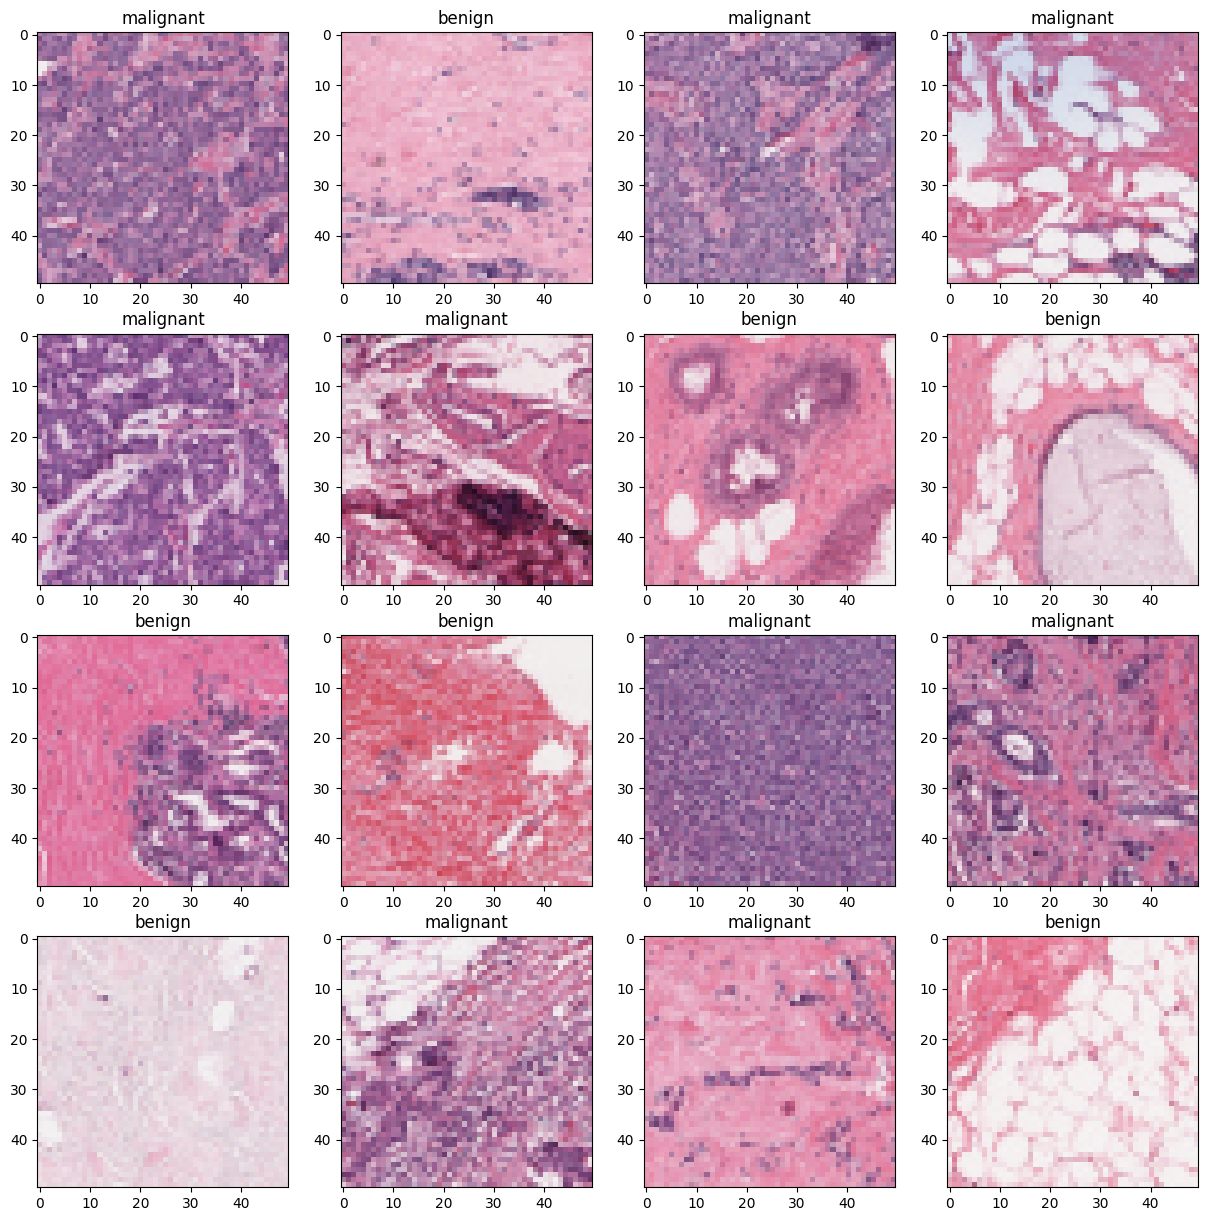

In [24]:
#Visualize images
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])


# **Split Dataset into train , validation and test**

In [25]:
#define train dataset size
train_ds = dataset.take(int(len(dataset)*0.8))
len(train_ds)

1000

In [26]:
#define non-train dataset size
rest_ds = dataset.skip(int(len(dataset)*0.8))
len(rest_ds)

250

In [27]:
#define validation dataset size
val_ds = rest_ds.take(int(len(rest_ds)*0.5))
len(val_ds)

125

In [28]:
#define test dataset size
test_ds = rest_ds.skip(int(len(rest_ds)*0.5)).take(int(len(rest_ds)))
len(test_ds)

125

In [29]:
#define train, validation, test dataset size using function
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=200)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [30]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [31]:
len(train_ds)

1000

In [32]:
len(val_ds)

125

In [33]:
len(test_ds)

125

Use techniques for Cache, Shuffle, and Prefetch the Dataset

In [34]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [35]:
#Creating a Layer for Resizing and Normalization
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [36]:
#Data Augmentation
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [37]:
#Applying Data Augmentation to Train Dataset
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)


##**Model Architecture**

In [38]:
input_shape = (BATCH_SIZE, IMG_SIZE, IMG_SIZE, CHANNELS)
n_classes = 2

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='sigmoid'),
])

model.build(input_shape=input_shape)

##**Model Summary**

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 50, 50, 3)           0         
                                                                 
 conv2d (Conv2D)             (32, 48, 48, 32)          896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 24, 24, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 22, 22, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 11, 11, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 9, 9, 64)           

**Compiling the Model**

In [40]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [41]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/20
1000/1000 [==============================] - 61s 34ms/step - loss: 0.4710 - accuracy: 0.7895 - val_loss: 0.4124 - val_accuracy: 0.8158
Epoch 2/20
1000/1000 [==============================] - 13s 13ms/step - loss: 0.4135 - accuracy: 0.8201 - val_loss: 0.5876 - val_accuracy: 0.7155
Epoch 3/20
1000/1000 [==============================] - 13s 13ms/step - loss: 0.3922 - accuracy: 0.8271 - val_loss: 0.3683 - val_accuracy: 0.8355
Epoch 4/20
1000/1000 [==============================] - 13s 13ms/step - loss: 0.3748 - accuracy: 0.8355 - val_loss: 0.4550 - val_accuracy: 0.8080
Epoch 5/20
1000/1000 [==============================] - 14s 14ms/step - loss: 0.3622 - accuracy: 0.8450 - val_loss: 0.3645 - val_accuracy: 0.8378
Epoch 6/20
1000/1000 [==============================] - 13s 13ms/step - loss: 0.3588 - accuracy: 0.8492 - val_loss: 0.3600 - val_accuracy: 0.8455
Epoch 7/20
1000/1000 [==============================] - 20s 20ms/step - loss: 0.3532 - accuracy: 0.8506 - val_loss: 0.3933 -

##**Model Evaluation**

In [47]:
scores = model.evaluate(test_ds)

125/125 [==============================] - 0s 3ms/step - loss: 0.2928 - accuracy: 0.8795


In [52]:
scores

[0.2927802503108978, 0.8794999718666077]

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

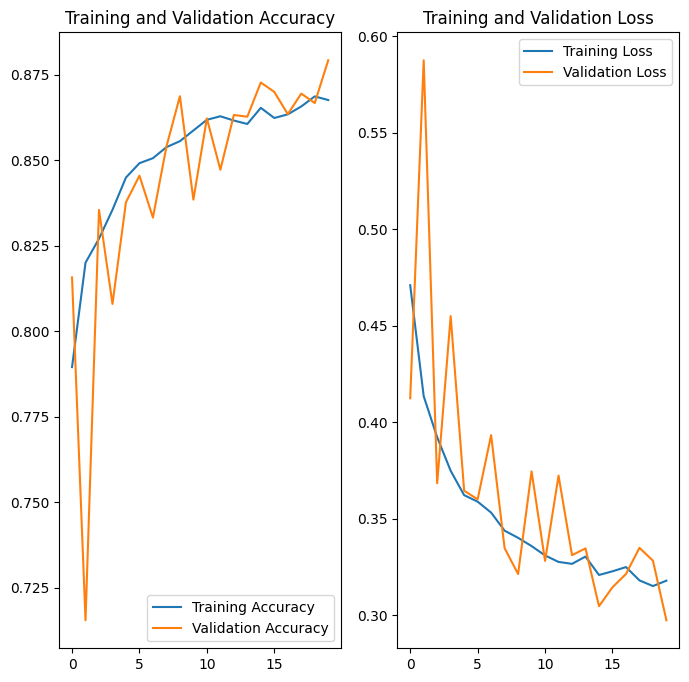

In [48]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 31ms/step
Accuracy: 0.8795
Precision: 0.8774
Recall: 0.8756
F1-score: 0.8765
Confusion Matrix:


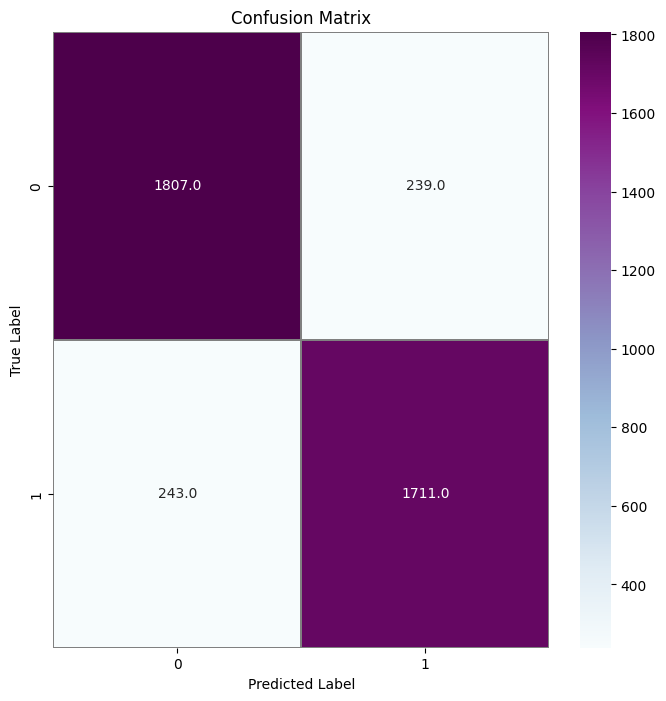

In [50]:
#Visualize performance measurements for evaluating the performance of the model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import seaborn as sns



# Define lists to store the true labels and predicted labels

true_labels = []

predicted_labels = []



# Iterate through the test image dataset and make predictions

for x, y in test_ds:

    predictions = model.predict(x)

    predicted_labels.extend(predictions.argmax(axis=1))

    true_labels.extend(y.numpy())





# Calculate accuracy

accuracy = accuracy_score(true_labels, predicted_labels)

print(f'Accuracy: {accuracy:.4f}')



# Calculate precision

precision = precision_score(true_labels, predicted_labels)

print(f'Precision: {precision:.4f}')



# Calculate recall

recall = recall_score(true_labels, predicted_labels)

print(f'Recall: {recall:.4f}')



# Calculate F1-score

f1 = f1_score(true_labels, predicted_labels)

print(f'F1-score: {f1:.4f}')



# Create confusion matrix

conf_matrix = confusion_matrix(true_labels, predicted_labels)

print('Confusion Matrix:')

f, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(conf_matrix, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)

plt.xlabel("Predicted Label")

plt.ylabel("True Label")

plt.title("Confusion Matrix")

plt.show()

## **Saving the Model**

In [54]:
#mount drive for save the model
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#ceate model directory
!mkdir /content/drive/MyDrive/models

In [55]:
# Define the version of the model

model_version=max([int(i) for i in os.listdir("/content/drive/MyDrive/models") + [0]])+1
model.save(f"/content/drive/MyDrive/models/{model_version}")

In [56]:
model.save("../potatoes.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
